In [ ]:
# in your notebook or another script
from Data_Enrichment import get_features

RAW_DIR = "data/raw"
# b) features + Ballon d'Or flag in one line
df_feats, feature_cols = get_features(RAW_DIR)
# Filter out rows where season_end_year != 2025
df_feats = df_feats[(df_feats['season_end_year'] != 2026)]

/workspaces/Machine-learning/Data_Enrichment.py:232: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["ballon_dor_winner"] = df["ballon_dor_winner"].fillna(False).astype(bool)


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing


In [4]:
df_num = df_feats.select_dtypes(include=[np.number]).drop(
    columns=['player_id', 'team_id'], errors='ignore'
)

# make sure everything is float so pandas can build the covariance matrix
df_num = df_num.astype(float)
# compute covariance matrix
M = df_num.cov()
# eigenvalues and eigenvectors
from numpy import linalg as LA
w, v = LA.eig(M)
w  # eigenvalues

array([ 6.17553794e+05,  4.05983256e+02,  2.23064352e+02,  4.95979946e+01,
        3.69936190e+01,  1.92505118e+01,  1.78701443e+01,  1.44849454e+01,
        1.01199002e+01,  4.31739466e+00,  3.65528116e+00,  3.10073968e+00,
        2.13701736e+00,  1.81154048e+00,  1.57618224e+00,  1.39780093e+00,
        1.27146532e+00,  1.17166694e+00,  1.15574751e+00,  1.08073025e+00,
        9.95047773e-01,  9.21240224e-01,  9.48271626e-01,  7.43136642e-01,
        6.47136774e-01,  4.70920950e-01,  4.52543660e-01,  3.85490109e-01,
        3.77336216e-01,  2.98114946e-01,  2.66351290e-01,  1.90976370e-01,
        1.40062626e-01,  1.10366468e-01,  7.66803956e-02,  7.11822607e-02,
        5.84570678e-02,  4.78577303e-02,  4.06577989e-02,  3.65385730e-02,
        3.24036300e-02,  3.08954749e-02,  2.36568509e-02,  2.29906752e-02,
        2.19843338e-02,  1.91332196e-02,  1.67800155e-02,  1.33153352e-02,
        1.04058475e-02,  9.04025671e-03,  6.49736464e-03,  6.36877546e-03,
        4.24106023e-03,  

In [5]:
pca = PCA()
pca.fit(df_num)


,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [6]:
pca.components_

array([[ 1.57488492e-04,  4.03830850e-04, -1.94801067e-05, ...,
         5.96550850e-06,  8.71311489e-06,  3.69289546e-06],
       [ 9.89882592e-02,  6.81709162e-02,  9.64388374e-03, ...,
         6.50799768e-05,  4.61188689e-04,  2.06902673e-04],
       [-4.86307053e-03, -1.27363231e-02, -3.66219455e-04, ...,
        -2.72101836e-05, -4.13700815e-05, -2.53813599e-05],
       ...,
       [ 0.00000000e+00,  4.12120378e-11,  7.65022927e-10, ...,
         1.31752084e-10, -8.41648436e-11,  8.76200557e-10],
       [ 0.00000000e+00, -9.46270946e-11, -8.37230268e-10, ...,
        -2.30382887e-10,  1.57817631e-10, -1.29696379e-09],
       [ 0.00000000e+00,  9.68348104e-11,  6.55266879e-10, ...,
         2.04013756e-10, -1.38060896e-10,  1.06758836e-09]],
      shape=(66, 66))

In [7]:
pca.explained_variance_

array([6.17553794e+05, 4.05983256e+02, 2.23064352e+02, 4.95979946e+01,
       3.69936190e+01, 1.92505118e+01, 1.78701443e+01, 1.44849454e+01,
       1.01199002e+01, 4.31739466e+00, 3.65528116e+00, 3.10073968e+00,
       2.13701736e+00, 1.81154048e+00, 1.57618224e+00, 1.39780093e+00,
       1.27146532e+00, 1.17166694e+00, 1.15574751e+00, 1.08073025e+00,
       9.95047773e-01, 9.48271626e-01, 9.21240224e-01, 7.43136642e-01,
       6.47136774e-01, 4.70920950e-01, 4.52543660e-01, 3.85490109e-01,
       3.77336216e-01, 2.98114946e-01, 2.66351290e-01, 1.90976370e-01,
       1.40062626e-01, 1.10366468e-01, 7.66803956e-02, 7.11822607e-02,
       5.84570678e-02, 4.78577303e-02, 4.06577989e-02, 3.65385730e-02,
       3.24036300e-02, 3.08954749e-02, 2.36568509e-02, 2.29906752e-02,
       2.19843338e-02, 1.91332195e-02, 1.67800155e-02, 1.33153352e-02,
       1.04058475e-02, 9.04025671e-03, 6.49736464e-03, 6.36877546e-03,
       4.24106023e-03, 2.91956668e-03, 2.30176211e-03, 2.06941939e-03,
      

In [8]:
pp = pca.transform(df_num)
def biplot(score,coeff,pcax,pcay,labels=None, Labels=None):
    pca1=pcax-1
    pca2=pcay-1
    xs = score[:,pca1]
    ys = score[:,pca2]
    n=score.shape[1]
    scalex = 1/(xs.max()- xs.min())
    scaley = 1/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley)
    for i in range(len(xs)): # Iterate through the number of samples
        if Labels is None:
            pass # Placeholder for empty if block
        else:
            plt.text(xs[i]*scalex, ys[i]*scaley, Labels[i], color='blue', ha='center', va='center')
    for i in range(n):
        plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5)
        if labels is None:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
X1 = min_max_scaler.fit_transform(df_num)

In [10]:
pca = PCA()
X_pca=pca.fit(X1)

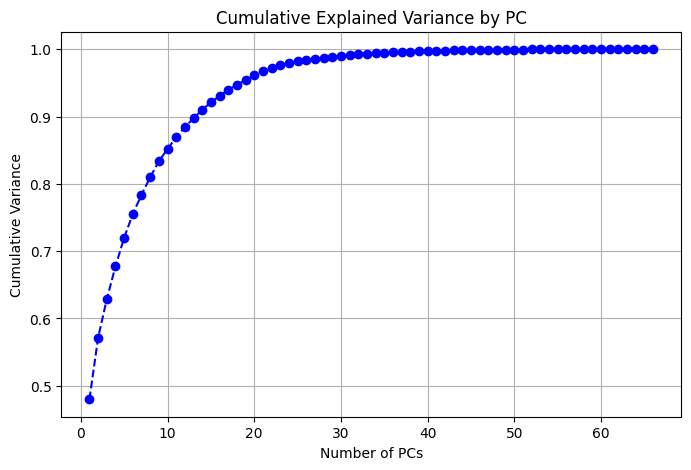

In [11]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# --- Visualize Explained variance ---
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by PC')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Variance')
plt.grid(True)
plt.show()


In [12]:
var_exp_df = pd.DataFrame({
    'Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance': explained_variance,
    'Cumulative Variance': cumulative_variance
})
var_exp_df.head(15)

,Component,Explained Variance,Cumulative Variance
0,PC1,0.479985,0.479985
1,PC2,0.091548,0.571533
2,PC3,0.057183,0.628716
3,PC4,0.048658,0.677374
4,PC5,0.042645,0.720019
5,PC6,0.035187,0.755205
6,PC7,0.028354,0.783560
7,PC8,0.026076,0.809635
8,PC9,0.023872,0.833507
9,PC10,0.018117,0.851624


In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)
pca = PCA(n_components=13)  # <- aquí defines cuántos componentes quieres
X_pca = pca.fit_transform(X_scaled)  # ahora X_pca tendrá shape (n_muestras, 13)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(13)])


In [14]:
import pandas as pd
X_pca_df = pd.DataFrame(X_pca[:, :13], columns=[f'PC{i+1}' for i in range(13)])

In [15]:

def create_pca_df(X_pca, n_components=13):
    """
    Convierte un array de PCA en un DataFrame listo para clustering.

    Parámetros:
    -----------
    X_pca : numpy.ndarray
        Array resultante de la transformación PCA (p.ej., pca.transform(X))
    n_components : int, opcional
        Número de componentes principales a incluir en el DataFrame (default=13)

    Retorna:
    --------
    pd.DataFrame
        DataFrame con columnas PC1, PC2, ..., PCn
    """
    df = pd.DataFrame(X_pca[:, :n_components],
                      columns=[f'PC{i+1}' for i in range(n_components)])
    return df


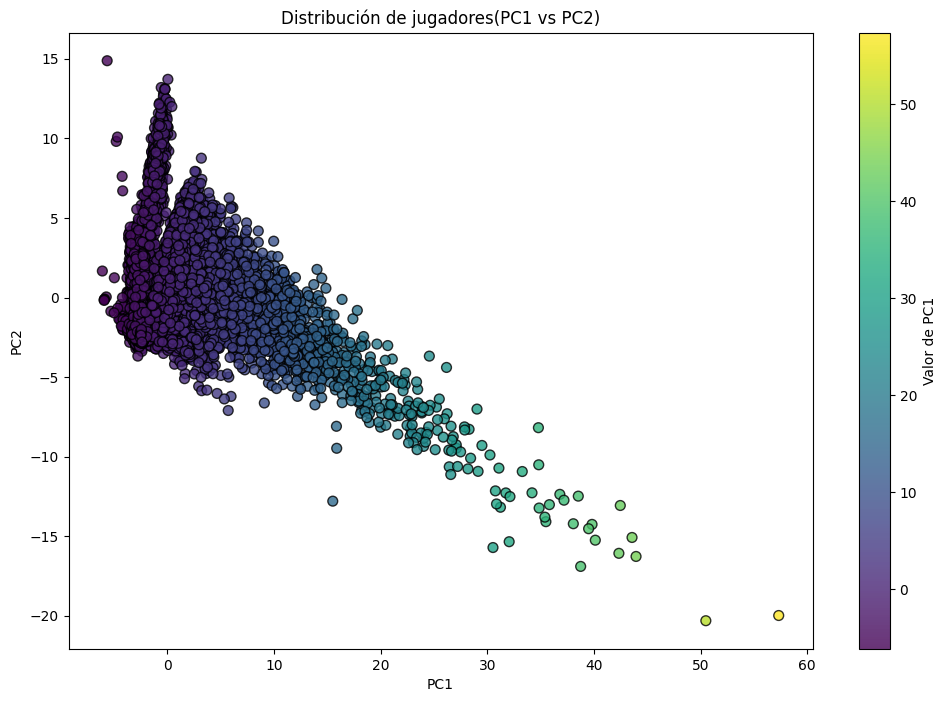

In [20]:
import matplotlib.pyplot as plt

X_pca_df = create_pca_df(X_pca, n_components=13)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    X_pca_df['PC1'], 
    X_pca_df['PC2'],
    c=X_pca_df['PC1'],       # color según PC1
    cmap='viridis',           # gradiente de color
    s=50,                     # tamaño de los puntos
    alpha=0.8,
    edgecolor='k'
)
plt.colorbar(scatter, label='Valor de PC1')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Distribución de jugadores(PC1 vs PC2)")
plt.show()
